In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from glob import glob
import gc

rc={'axes.labelsize': 15.0,
    'font.size': 15.0, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15.0,
    'xtick.labelsize': 15.0,
    'ytick.labelsize': 15.0}
plt.rcParams.update(**rc)

In [2]:
def get_code(x, y):
    if ((x=="Y") & (y=="Y")):
        return "GA"
    elif ((x=="Y") & (y=="N")):
        return "G"
    elif ((x=="N") & (y=="Y")):
        return "A"

## AutoML performance

In [3]:
df_model = pd.read_csv("./data/AutoML_models.csv")
df_model = df_model.rename(columns={"SpatialScale":"Region"})
df_model['type'] = df_model.apply(lambda x: get_code(x['Gas'], x['AOD']), axis=1)
print(list(df_model["BestModel"].unique()))

best_model = []
for TimeScale in ["daily", "Monthly_D", "Monthly"]:
    for feature_type in ["GA","A","G"]:
        for Region in ["E","S","W","N","C","A"]:
            best_model.append(df_model[(df_model["TimeScale"]==TimeScale)
                                 &(df_model["type"]==feature_type)
                                 &(df_model["Region"]==Region)]["BestModel"].item())

['xgboost', 'lgbm', 'extra_tree', 'catboost']


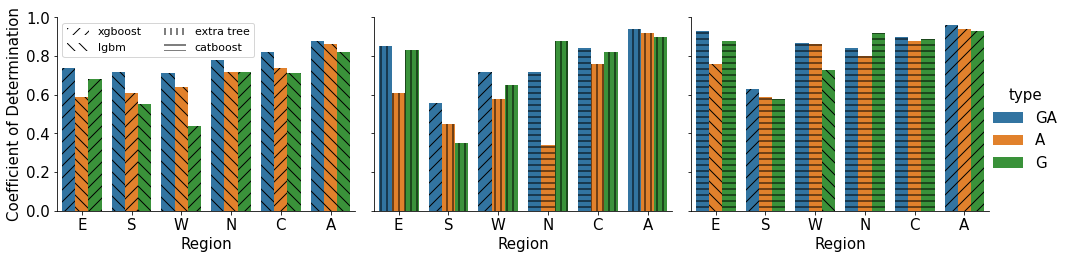

In [4]:
df = pd.read_csv("./data/AutoML_wo_aod.csv")
df = df.rename(columns={"SpatialScale":"Region"})
#ax = sns.barplot(x="SpatialScale",y="R2",hue="Gas",data=df)
df['type'] = df.apply(lambda x: get_code(x['Gas'], x['AOD']), axis=1)

hatch_dict = {
    "xgboost":"//",
    "lgbm":"\\\\",
    "extra_tree":"||",
    "catboost":"--"
}
hatch_ls = [hatch_dict[k] for k in best_model]
h_idx = 0

for y in ["R2"]:
    g = sns.catplot(x="Region",y=y,
                    hue="type", order=["E","S","W","N","C","A"],
                    col="TimeScale",
                    data=df,kind="bar")
    g.fig.set_size_inches(15,3.6)
    axes = g.axes.flatten()
    for i in range(3):
        axes[i].set_title("")
        axes[i].set_ylim(0,1)
        for _,thisbar in enumerate(axes[i].patches):
            # Set a different hatch for each bar
            thisbar.set_hatch(hatch_ls[h_idx])
            h_idx+=1
    axes[0].set_ylabel("Coefficient of Determination")
    c1 = mpatches.Patch(facecolor = "w", hatch="//", label="xgboost")
    c2 = mpatches.Patch(facecolor = "w", hatch="\\\\", label="lgbm")
    c3 = mpatches.Patch(facecolor = "w", hatch="||", label="extra tree")
    c4 = mpatches.Patch(facecolor = "w", hatch="--", label="catboost")
    axes[0].legend(handles = [c1,c2,c3,c4],ncol=2,loc=0,fontsize=11)
    
#     plt.tight_layout()
    plt.savefig("../figures/fig2_AutoML.pdf")
    plt.show()

In [5]:
monthly = df[(df["TimeScale"]=="Monthly")& (df["Gas"]=="Y") & (df["AOD"]=="Y")].reset_index(drop=True)
monthly_D = df[(df["TimeScale"]=="Monthly_D")& (df["Gas"]=="Y") & (df["AOD"]=="Y")].reset_index(drop=True)
monthly["diff"] = monthly["R2"] - monthly_D["R2"]
monthly

,Region,TimeScale,Gas,AOD,R2,RMSE,MAE,type,diff
0,E,Monthly,Y,Y,0.93,2.07,1.54,GA,0.08
1,S,Monthly,Y,Y,0.63,2.84,2.24,GA,0.07
2,W,Monthly,Y,Y,0.87,2.46,1.96,GA,0.15
3,N,Monthly,Y,Y,0.84,3.73,2.96,GA,0.12
4,A,Monthly,Y,Y,0.96,2.64,1.88,GA,0.02
5,C,Monthly,Y,Y,0.90,3.14,2.48,GA,0.06


## LR performance

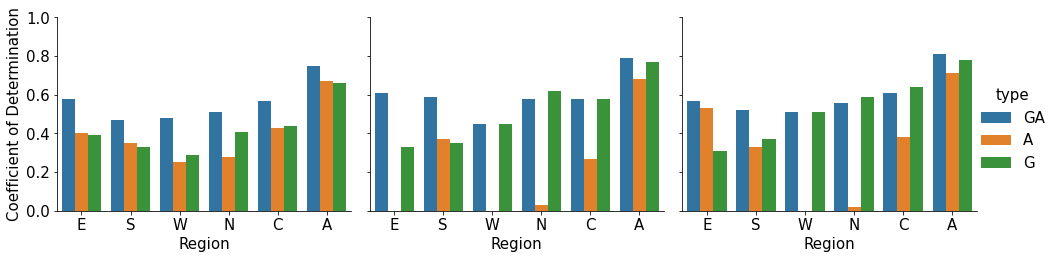

In [6]:
df = pd.read_csv("./data/LR_wo_aod.csv")
df = df.rename(columns={"SpatialScale":"Region"})
#ax = sns.barplot(x="SpatialScale",y="R2",hue="Gas",data=df)
df['type'] = df.apply(lambda x: get_code(x['Gas'], x['AOD']), axis=1)

for y in ["R2"]:
    g = sns.catplot(x="Region",y=y,
                    hue="type", order=["E","S","W","N","C","A"],
                    col="TimeScale",
                    data=df,kind="bar")
    g.fig.set_size_inches(15,3.6)
    axes = g.axes.flatten()
    for i in range(3):
        axes[i].set_title("")
        axes[i].set_ylim(0,1)
    axes[0].set_ylabel("Coefficient of Determination")
#     plt.tight_layout()
    plt.savefig("../figures/fig2_LR.pdf")
    plt.show()